In [4]:
import requests
import os
import numpy as np
import pandas as pd

%matplotlib inline

In [5]:
stock_df = pd.read_csv("Resources/stock_data.csv", index_col="date", infer_datetime_format=True, parse_dates=True)['close']
stock_df = stock_df.sort_index()
stock_df.tail()

date
2020-12-22    640.09
2020-12-23    645.98
2020-12-24    661.66
2020-12-28    663.77
2020-12-29    665.98
Name: close, dtype: float64

In [6]:
returns = stock_df.pct_change()
returns.dropna(inplace=True)
returns.head()

date
2019-12-31    0.008562
2020-01-02    0.028864
2020-01-03    0.029077
2020-01-06    0.019537
2020-01-07    0.039366
Name: close, dtype: float64

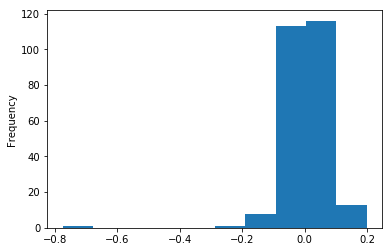

In [7]:
returns.plot(kind="hist")

In [8]:
mean = returns.mean()
std = returns.std()
(mean, std)

(0.006303122470704071, 0.07441570754830548)

In [9]:
from random import gauss
gauss(mean, std)

0.02983774126304615

In [10]:
last_val = stock_df.iloc[-1]
last_val

665.98

In [11]:
last_val * (1+gauss(mean,std))

670.8160236724643

In [12]:
simvals = [last_val]
days = 15
for day in range(days):
    newval = simvals[:]

In [13]:
def simulate_stocks(days,starting_val):
    simvals = [starting_val]
    
    for day in range(days):
        newval = simvals[-1] * (1+gauss(mean,std))
        simvals.append(newval)
        

    return simvals

In [14]:
simulate_stocks(30,last_val)

[665.98,
 692.9199788463403,
 775.6381832503052,
 767.1712632240105,
 819.8410063836537,
 804.1140858939985,
 762.9338587067494,
 739.4182537090185,
 693.0071615880289,
 595.5831918365467,
 611.7734697760674,
 647.5050633881941,
 642.9380768012087,
 660.1447279485893,
 676.4494514629721,
 681.2627157792778,
 647.824861280989,
 645.398767606584,
 617.6778282488089,
 639.6442504584606,
 689.3800257276405,
 642.7052237463234,
 662.0998011315063,
 678.3322479210259,
 657.6288881852012,
 707.7480635067371,
 719.8572482689347,
 671.0421845692138,
 651.0948254311587,
 706.6964893129316,
 824.7525612340585]

In [15]:
trials =1000
results = []
for trial in range(trials):
    results.append(simulate_stocks(15,last_val))

In [16]:
pd.DataFrame(results).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,665.98,648.815441,686.036433,707.267886,705.187683,746.868627,729.099755,726.680821,647.571602,757.911711,740.676696,680.679601,707.779172,753.972096,813.767692,903.448448
1,665.98,747.699938,764.932636,651.791395,618.096606,710.363516,652.025926,644.701826,634.951076,643.848740,658.273121,626.729098,653.029820,647.804093,631.365361,722.799974
2,665.98,719.292941,731.946657,672.705379,748.988667,830.081554,721.482607,728.840350,676.274491,764.799836,766.741727,747.605320,754.117831,758.759956,725.510313,789.046685
3,665.98,658.218294,658.854325,667.091045,565.393910,557.042190,528.827973,479.581824,456.331085,478.624336,416.946785,380.013640,377.410958,400.174454,386.167771,397.937004
4,665.98,697.612555,724.246623,673.130391,717.311491,718.268421,635.536197,643.000514,614.718841,598.659828,528.749932,534.069797,488.439825,472.960591,445.920621,460.711495


In [17]:
results_df = pd.DataFrame(results).T
results_df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,665.980000,665.980000,665.980000,665.980000,665.980000,665.980000,665.980000,665.980000,665.980000,665.980000,...,665.980000,665.980000,665.980000,665.980000,665.980000,665.980000,665.980000,665.980000,665.980000,665.980000
1,648.815441,747.699938,719.292941,658.218294,697.612555,666.082928,649.579621,694.727746,599.383174,575.673142,...,644.762475,772.223993,697.280339,709.463170,573.934970,669.196147,559.746361,627.577333,638.915444,782.812083
2,686.036433,764.932636,731.946657,658.854325,724.246623,725.703617,742.674473,694.745505,593.308682,601.828026,...,677.305621,821.317191,660.071686,727.678219,574.531987,663.862982,590.478439,631.546895,638.847383,756.109753
3,707.267886,651.791395,672.705379,667.091045,673.130391,767.690978,801.614932,714.821313,510.912075,629.647029,...,656.658035,769.212005,643.527733,691.266924,574.717313,651.548844,606.994461,668.117589,719.420523,729.207572
4,705.187683,618.096606,748.988667,565.393910,717.311491,843.746496,815.610826,692.727274,540.079507,596.569532,...,680.253442,787.797679,622.052499,776.713181,591.210590,540.189742,585.734915,613.070855,739.477154,847.283370


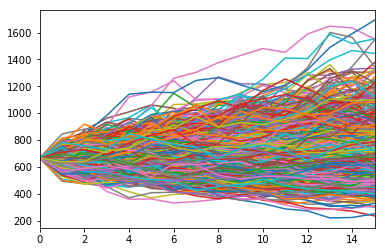

In [18]:
results_df.plot(legend=False)

In [19]:
end_values = results_df.iloc[-1]
end_values.head()

0    903.448448
1    722.799974
2    789.046685
3    397.937004
4    460.711495
Name: 15, dtype: float64

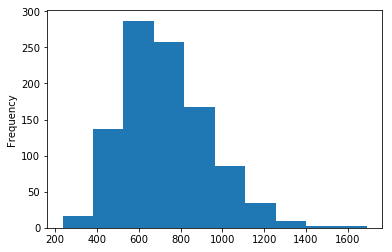

In [20]:
end_values.plot(kind="hist")

In [21]:
end_values.quantile([0.1,0.9])

0.1    492.995243
0.9    992.289837
Name: 15, dtype: float64

In [22]:
last_val

665.98